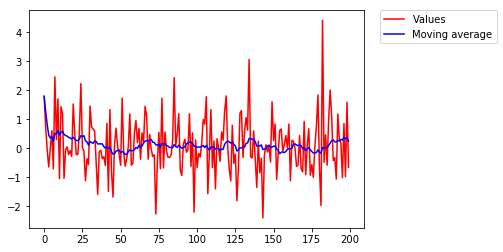

In [151]:
#TASK 1 - Moving Average
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

L = 200 #Setting the length of the dataset
a = [np.random.randn() for i in range(L)] #Generating values from a random walk
W = 20 #Setting the window Lenght - assumed by me
y = []
for i in range(len(a)):
    s = 0
    n = 0
    for j in range(W):
        if i-j < 0:
            break;
        
        s = s + a[i-j]
        n = n + 1
    y.append(s/n) #Moving average values

plt.plot(a,'r', label='Values')
plt.plot(y, 'b', label='Moving average')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [152]:
#TASK 2 - Binomial Options Pricing 
#European Option Pricing
import numpy as np

def EuropeanBinomialCall(S,K,T,r,sigma,n=100):
    deltaT = T/n
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1.0 / u
    a = np.exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i+1)] for i in range(n+1)]
    for j in range (n+1):#filling the last nodes of the tree
        v[n][j]=max(S*u**j*d**(n-j)-K,0.0)
    for i in range(n-1, -1, -1):#going backwards
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) #filling the nodes
    return v[0][0]
def EuropeanBinomialPut(S,K,T,r,sigma,n=100):
    deltaT = T/n
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1.0 / u
    a = np.exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i+1)] for i in range(n+1)]
    for j in range (n+1):#filling the last nodes of the tree
        v[n][j]=max(-S*u**j*d**(n-j)+K,0.0)
    for i in range(n-1, -1, -1):#going backwards
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) #filling the nodes
    return v[0][0]

#American Option Pricing
def AmericanBinomialCall(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a =np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(S* u**j * d**(n-j)-K,0.0)
    for i in range(n-1,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max((S* u**j * d**(i-j))-K,0) 
            v[i][j]=max(v1,v2)
    return v[0][0]

def AmericanBinomialPut(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a =np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(-S* u**j * d**(n-j)+K,0.0)
    for i in range(n-1,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max(-(S* u**j * d**(i-j))+K,0) 
            v[i][j]=max(v1,v2)
    return v[0][0]

#Bermudan Option Pricing
#I am constructing a Bermudan wich allows early exercising only in first 10 steps
def BermudanBinomialCall(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a =np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(S* u**j * d**(n-j)-K,0.0)
    for i in range(n-1, 10, -1):
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
    for i in range(10,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max((S* u**j * d**(i-j))-K,0) 
            v[i][j]=max(v1,v2)
    
    return v[0][0]

def BermudanBinomialPut(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a =np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(-S* u**j * d**(n-j)+K,0.0)
    for i in range(n-1, 10, -1):
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
    for i in range(10,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max(-(S* u**j * d**(i-j))+K,0) 
            v[i][j]=max(v1,v2)
    return v[0][0]

print ('European Call Price: ', "%.4f" %EuropeanBinomialCall(100,120,5,0.1,0.05))
print ('European Put Price: ', "%.4f" %EuropeanBinomialPut(100,120,5,0.1,0.05))
print ('American Call Price: ', "%.4f" %AmericanBinomialCall(100,120,5,0.1,0.05))
print ('American Put Price: ', "%.4f" %AmericanBinomialPut(100,120,5,0.1,0.05))
print ('Bermudan Call Price: ', "%.4f" %BermudanBinomialCall(100,120,5,0.1,0.05))
print ('Bermudan Put Price: ', "%.4f" %BermudanBinomialPut(100,120,5,0.1,0.05))

European Call Price:  27.2192
European Put Price:  0.0029
American Call Price:  27.2192
American Put Price:  20.0000
Bermudan Call Price:  27.2192
Bermudan Put Price:  20.0000


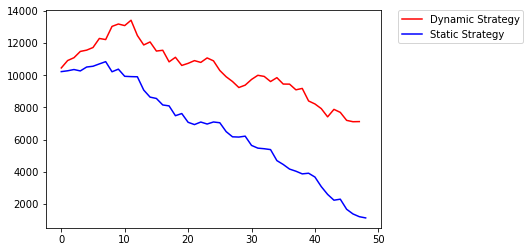

The final wealth of dynamic strategy: 7116.929757
The final wealth of static strategy: 1120.249968


In [174]:
#TASK 3 
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import datetime

msft = pd.read_csv("msft.csv", index_col=0, parse_dates=True)
aapl = pd.read_csv("aapl.csv", index_col=0, parse_dates=True)

#I know this is not a great code but I think it works...
capital = 10000
p=0.5
r=0.5
AopenPrice = aapl['Open']
MopenPrice = msft['Open']
AclosePrice = aapl['Close']
MclosePrice = msft['Close']
#initial position
AppleLots = np.floor(capital*p/AopenPrice[0])
MicrosoftLots = np.floor(capital*((1.0-p)/MopenPrice[0]))
Alot=[]
Mlot=[]
Alot2=[]
Mlot2=[]
PortfolioValue=[]
PortfolioValue2=[]
for k in range(10, AopenPrice.size+1, 5):#rebalancing every week according to last two weeks' average, 1 week=5days
        AVApplePrice =0
        AVMicrosoftPrice=0
        a=0
        m=0
        tempcap=0
        rtempcap=0
        for i in range (10):
            a+=AclosePrice[k-1-i]
            m+=MclosePrice[k-1-i]
        AVApplePrice=a/10
        AVMicrosoftPrice=m/10
        if AopenPrice[k]>=AVApplePrice and MopenPrice[k]>=AVMicrosoftPrice:
            None
        if AopenPrice[k]<AVApplePrice and MopenPrice[k]<AVMicrosoftPrice:
            None  
        if AopenPrice[k]>AVApplePrice and MopenPrice[k]<=AVMicrosoftPrice:
            tempcap=MopenPrice[k]*np.floor(MicrosoftLots*r)
            MicrosoftLots=MicrosoftLots-np.floor(MicrosoftLots*r)
            AppleLots =AppleLots + np.floor(tempcap/AopenPrice[k])
            rtempcap=tempcap-np.floor(tempcap/AopenPrice[k])*AopenPrice[k]
        if AopenPrice[k]<=AVApplePrice and MopenPrice[k]>AVMicrosoftPrice:
            tempcap=AopenPrice[k]*np.floor(AppleLots*r)
            AppleLots=AppleLots-np.floor(AppleLots*r)
            MicrosoftLots =MicrosoftLots+np.floor(tempcap/MopenPrice[k])
            rtempcap=tempcap-np.floor(tempcap/MopenPrice[k])*MopenPrice[k]
        Alot.append(AppleLots)
        Mlot.append(MicrosoftLots)
        PortfolioValue.append(MclosePrice[k]*MicrosoftLots+AclosePrice[k]*AppleLots+rtempcap)

#setting the initial position again 
AppleLots2 = np.floor(capital*p/AopenPrice[0])
MicrosoftLots2 = np.floor(capital*((1.0-p)/MopenPrice[0]))
for k in range(5, AopenPrice.size+1, 5):#rebalancing every week according to p/1-p ratio, 1 week=5days
        tempcap=0
        rtempcap=0
        #selling all the stocks at the end of every 5th day and re positioning at the begining of the new week
        tempcap=AppleLots2*AclosePrice[k-1]+MicrosoftLots2*MclosePrice[k-1]
        AppleLots2 = np.floor(tempcap*p/AopenPrice[k])
        MicrosoftLots2 = np.floor(tempcap*((1.0-p)/MopenPrice[k]))
        rtempcap=tempcap-MicrosoftLots2*MopenPrice[k]-AppleLots2*AopenPrice[k]
        Alot2.append(AppleLots2)
        Mlot2.append(MicrosoftLots2)
        PortfolioValue2.append(MclosePrice[k]*MicrosoftLots2+AclosePrice[k]*AppleLots2+rtempcap)    
        
plt.plot(PortfolioValue,'r', label='Dynamic Strategy')
plt.plot(PortfolioValue2, 'b', label='Static Strategy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

PortfolioValue.reverse()
PortfolioValue2.reverse()
print('The final wealth of dynamic strategy:',PortfolioValue[0])
print('The final wealth of static strategy:' ,PortfolioValue2[0])
